In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
import math

In [2]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident,inc_time,inc_dreported,inc_submittedtime from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident inc_time inc_dreported inc_submittedtime
0       2016-03-31     0800    2016-03-31              2025
1       2016-03-31     2100    2016-04-01              1553
2       2016-04-01     1957    2016-04-01              2002
3       2016-03-25     1400    2016-04-01              2126
4       2016-04-02     0730    2016-04-02              0752
5       2016-04-01     1200    2016-04-02              1042
6       2016-04-01     1800    2016-04-02              1051
7       2016-04-02     1600    2016-04-02              1713
8       2016-04-02     1700    2016-04-02              1806
9       2016-04-03     1630    2016-04-03              1710
10      2016-04-03     1715    2016-04-03              1917
11      2016-04-02     1000    2016-04-04              1150
12      2016-04-02     1000    2016-04-04              1209
13      2016-04-02     1000    2016-04-04              1350
14      2016-04-02     1100    2016-04-04              1420
15      2016-04-02     1200    2016-04-0

In [3]:
df_inc = df.copy()
df_inc = df_inc[df_inc.inc_dincident > '2016-03-31']
df_inc = df_inc[df_inc.inc_dincident < '2019-10-01']
print(df_inc)

     inc_dincident inc_time inc_dreported inc_submittedtime
2       2016-04-01     1957    2016-04-01              2002
4       2016-04-02     0730    2016-04-02              0752
5       2016-04-01     1200    2016-04-02              1042
6       2016-04-01     1800    2016-04-02              1051
7       2016-04-02     1600    2016-04-02              1713
8       2016-04-02     1700    2016-04-02              1806
9       2016-04-03     1630    2016-04-03              1710
10      2016-04-03     1715    2016-04-03              1917
11      2016-04-02     1000    2016-04-04              1150
12      2016-04-02     1000    2016-04-04              1209
13      2016-04-02     1000    2016-04-04              1350
14      2016-04-02     1100    2016-04-04              1420
15      2016-04-02     1200    2016-04-04              1431
16      2016-04-04     1450    2016-04-04              1503
17      2016-04-02     1200    2016-04-04              1511
18      2016-04-04     1030    2016-04-0

In [4]:
df_inc['hour'] = df_inc['inc_time'].str[:2]
df_inc = df_inc.astype({'hour':'int'})
print(df_inc[df_inc.hour == 23])

     inc_dincident inc_time inc_dreported inc_submittedtime  hour
80      2016-04-14     2300    2016-04-15              2326    23
101     2016-04-20     2359    2016-04-21              1713    23
146     2016-05-01     2300    2016-05-02              0830    23
166     2016-05-05     2315    2016-05-06              0706    23
184     2016-05-08     2300    2016-05-09              0058    23
527     2016-07-14     2330    2016-07-15              1301    23
580     2016-07-28     2347    2016-07-29              0003    23
581     2016-07-28     2300    2016-07-29              0557    23
612     2016-08-03     2300    2016-08-04              0050    23
613     2016-08-03     2300    2016-08-04              0518    23
621     2016-08-02     2339    2016-08-05              0854    23
629     2016-08-08     2300    2016-08-09              0458    23
689     2016-08-21     2300    2016-08-22              0032    23
798     2016-09-11     2330    2016-09-12              0044    23
827     20

In [5]:
total_days = (max(df_inc.inc_dincident)-min(df_inc.inc_dincident)).days

(-0.5, 3301.5, 495.5, -0.5)

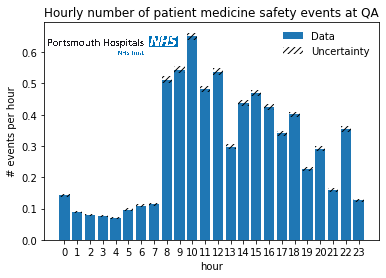

In [22]:
bins = [i-0.5 for i in range(25)]
data_x = [i for i in range(24)]
data_y_tot,_ = np.histogram(df_inc.hour.values, bins=bins)
data_y = data_y_tot/total_days
data_y_err = np.sqrt(data_y_tot)/total_days
plt.bar(data_x,data_y,label='Data')
plt.bar(data_x,data_y_err,bottom=data_y-data_y_err/2,alpha=0.5,color='none',hatch="////",label='Uncertainty')
plt.legend(frameon=False)
ax = plt.gca()
ax.set_xticks(np.arange(24))
plt.xlabel('hour');
plt.ylabel('# events per hour')
plt.title('Hourly number of patient medicine safety events at QA')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.65, 0.3, 0.3], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

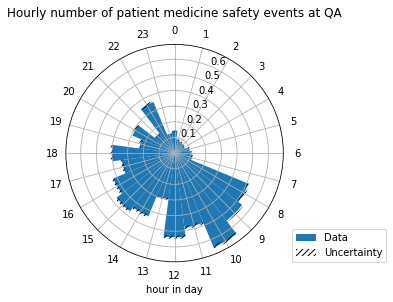

In [23]:
# Compute pie slices
N = 24
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
theta_deg = np.linspace(0.0, 360, N, endpoint=False)
radii = data_y
radii_err = data_y_err
width = 2 * np.pi/N
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width,label='Data');
ax.bar(theta, radii_err, bottom=radii-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
plt.xlabel('hour in day')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) )

In [24]:
morning_radii = np.zeros(len(radii))
afternoon_radii = np.zeros(len(radii))
evening_radii = np.zeros(len(radii))
for i in range(24):
    print(i)
    if i <= 7: morning_radii[i] = radii[i]
    elif i >= 8 and i <= 15: afternoon_radii[i] = radii[i]
    else: evening_radii[i] = radii[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


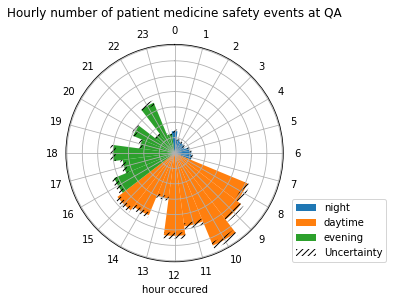

In [25]:
ax = plt.subplot(111, projection='polar');
ax.bar(theta, morning_radii, width=width,label='night');
ax.bar(theta, afternoon_radii, width=width,label='daytime');
ax.bar(theta, evening_radii, width=width,label='evening');
ax.bar(theta, 2*radii_err, bottom=radii-radii_err,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_yticklabels([])
plt.xlabel('hour occured')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) );

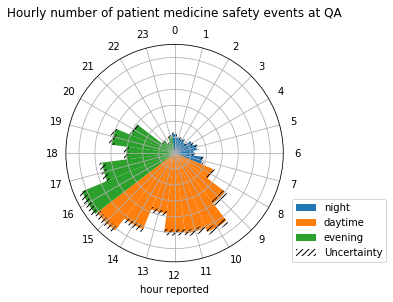

In [26]:
df_rep = df.copy()
df_rep = df_rep[df_rep.inc_dreported > '2016-03-31']
df_rep = df_rep[df_rep.inc_dreported < '2019-10-01']
df_rep['rep_hour'] = df_rep['inc_submittedtime'].str[:2]
df_rep = df_rep.astype({'rep_hour':'int'})
data_y_tot,_ = np.histogram(df_rep.rep_hour.values, bins=bins)
data_y = data_y_tot/total_days
data_y_err = np.sqrt(data_y_tot)/total_days
radii = data_y
radii_err = data_y_err
morning_radii = np.zeros(len(radii))
afternoon_radii = np.zeros(len(radii))
evening_radii = np.zeros(len(radii))
for i in range(24):
    if i <= 7: morning_radii[i] = radii[i]
    elif i >= 8 and i <= 15: afternoon_radii[i] = radii[i]
    else: evening_radii[i] = radii[i]
ax = plt.subplot(111, projection='polar');
ax.bar(theta, morning_radii, width=width,label='night');
ax.bar(theta, afternoon_radii, width=width,label='daytime');
ax.bar(theta, evening_radii, width=width,label='evening');
ax.bar(theta, 2*radii_err, bottom=radii-radii_err,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_yticklabels([])
plt.xlabel('hour reported')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) );